# Model Testing

In [1]:
from utils import load_model_history, plot_performance_curves, load_test_data, plot_test_metrics
from keras.utils import set_random_seed

# What's the meaning of life, the universe and everything!?
set_random_seed(42)

In [2]:
# Load model from the model name
model_name = "resnet50-regularized-adamax-epochs100-noaug_model_cifake"

model_history_loaded, classifier, history = load_model_history(model_name)

## Model Architecture

In [3]:
# Get model architecture
classifier.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization_2 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                16448     
                                                           

## Performance curves

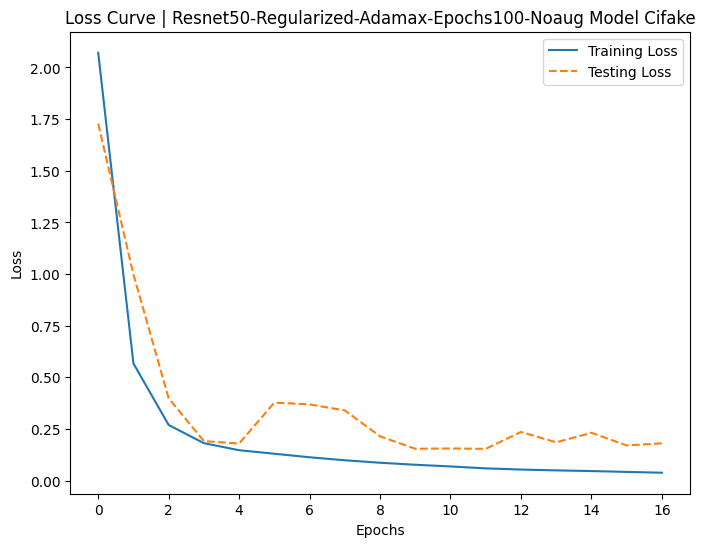

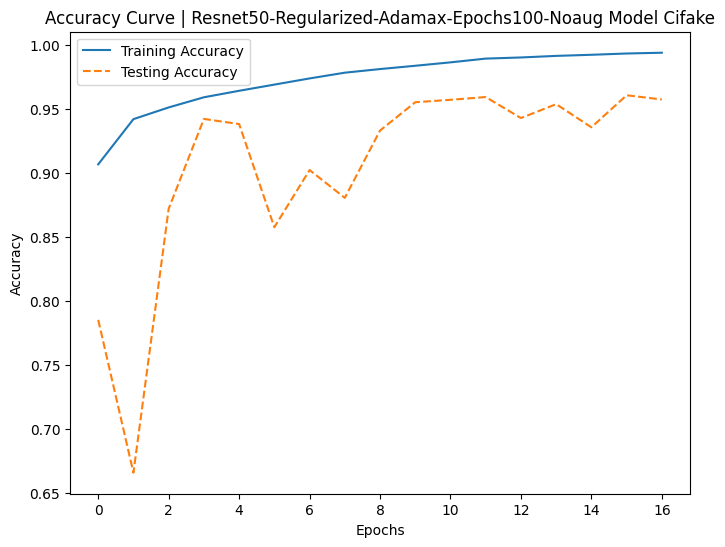

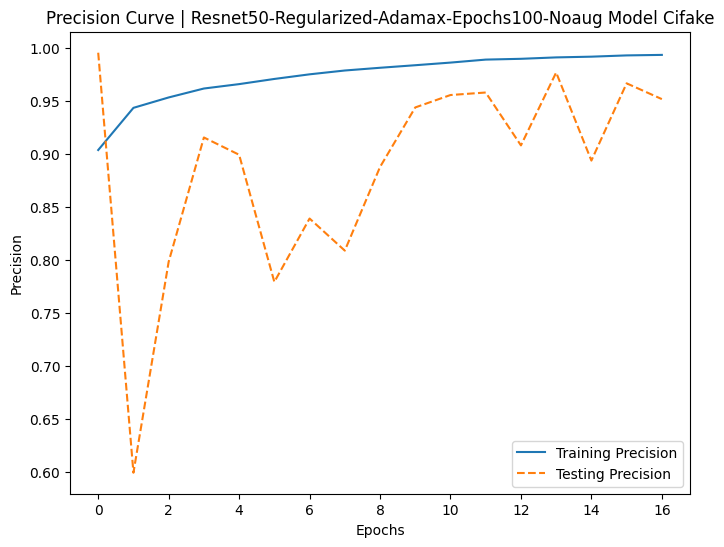

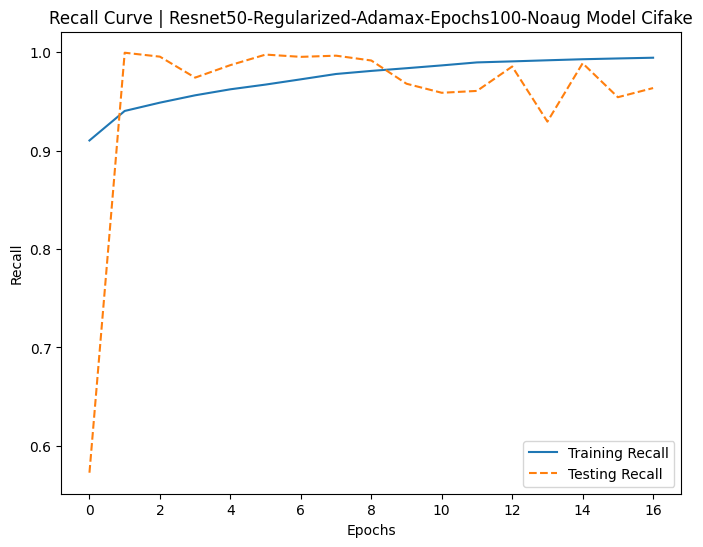

In [4]:
# Plot model performance curves
plot_performance_curves(history, model_name)

## Model Evaluation and Testing

In [5]:
# Load testing data from directory
test_dir = './datasets/CIFAKE/test/'

test_generator = load_test_data(test_dir, augmented=True, data_config={}, batch_size=200)

Found 20000 images belonging to 2 classes.


In [6]:
# Evaluate model
classifier.evaluate(test_generator)

100/100 [==============================] - 6s 35ms/step - loss: 0.1537 - accuracy: 0.9599 - precision_3: 0.9590 - recall_3: 0.9609


[0.15372076630592346,
 0.9599000215530396,
 0.9589820504188538,
 0.9609000086784363]

100/100 [==============================] - 4s 34ms/step
ROC AUC Score: 0.9599000000000001
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     10000
           1       0.96      0.96      0.96     10000

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000



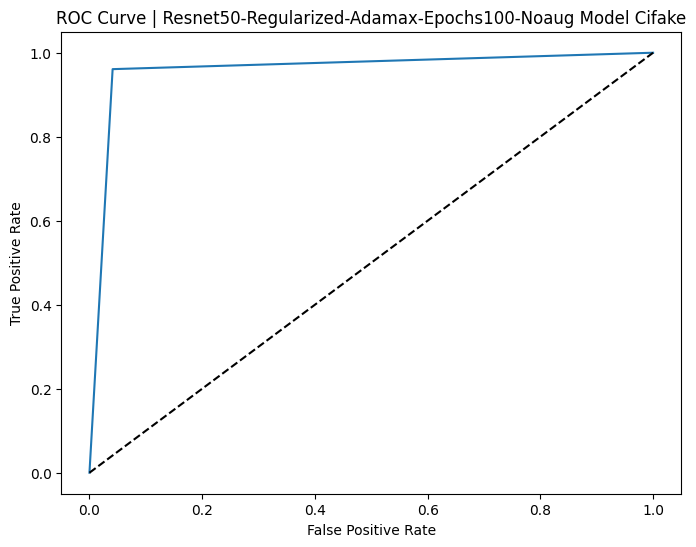

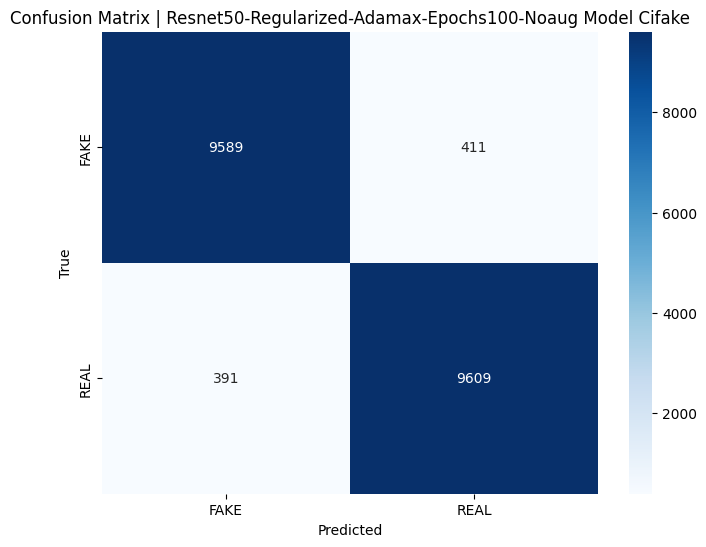

In [7]:
plot_test_metrics(classifier, test_generator, model_name)